<a href="https://colab.research.google.com/github/ProjectsMC/Deteccion_plagas_maiz/blob/main/InterfazUsuario_deteccion_plagaen_maiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTERFAZ DE USUARIO PARA DETECCIÓN DE PLAGAS
Proyecto Inteligencia Artificial
Master en Automática y Robótica

**Para interactuar con la interfaz siga el paso a paso presentado**

*   Micaela Cabrera 23023
*   Ivonne Quizhpe 23146



# Conectandosé con Google Drive

In [1]:
# @title ### **Import Google Drive** { display-mode: "form" }
# @markdown Dar en el botón "Run" para hacer su google drive accesible
from google.colab import drive

drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


# Instalando librerías

In [2]:

import numpy as np
import pandas as pd
import tensorflow as tf
!pip install opendatasets
import opendatasets as od
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import cv2
import os

import warnings
warnings.filterwarnings('ignore')

!git clone https://github.com/ProjectsMC/Deteccion_plagas_maiz
%cd /content/Deteccion_plagas_maiz/


Cloning into 'Deteccion_plagas_maiz'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 4.33 MiB | 18.18 MiB/s, done.
/content/Deteccion_plagas_maiz


# Cargando el modelo

In [3]:
from keras.models import load_model
model = load_model('/content/Deteccion_plagas_maiz/bestModel.h5')

# Se crea función para probar imágenes

In [4]:
class_names =['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [5]:
#Se crea función para redimensionar imagen y ponerla a prueba con el modelo creado por la red
def predict(model,img):
    arreglo = np.array(img)
    #img_array = tf.keras.preprocessing.image.img_to_array(arreglo.numpy())
    img_array = tf.expand_dims(img, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(np.max(predictions[0]),2)
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

# Probando imágenes
Al darle al "Run" se comprueba las imágenes dentro de la carpeta

1/1 [==============================] - 0s 17ms/step


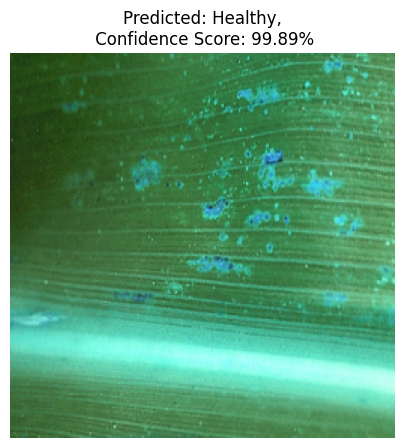

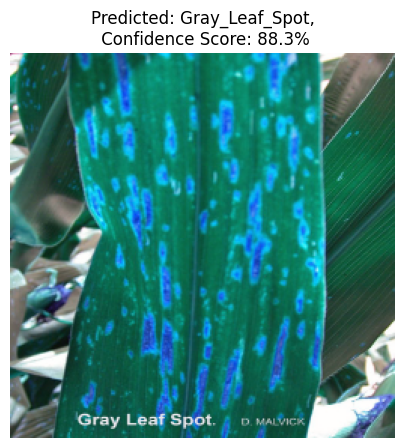

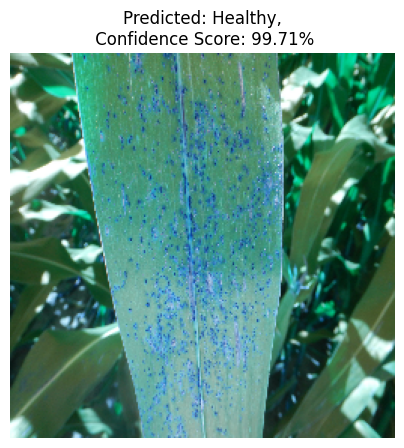

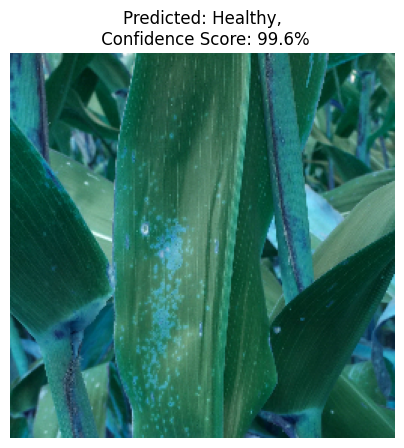

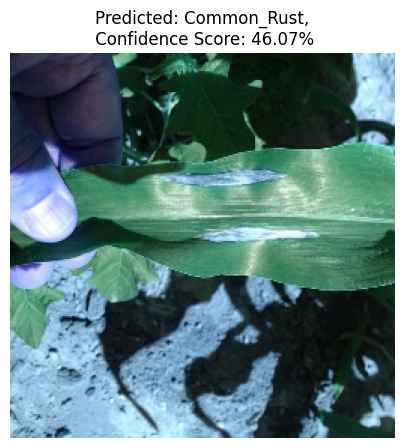

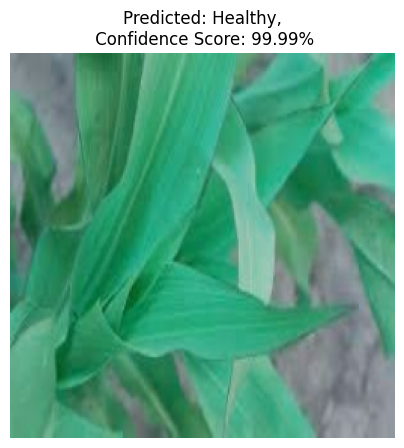

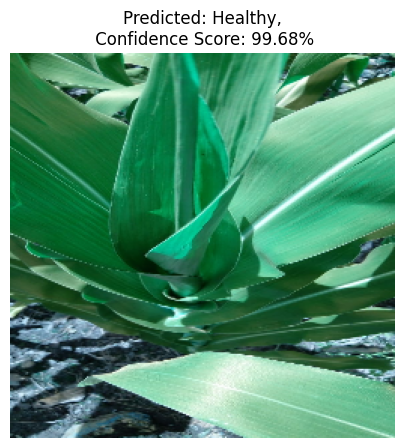

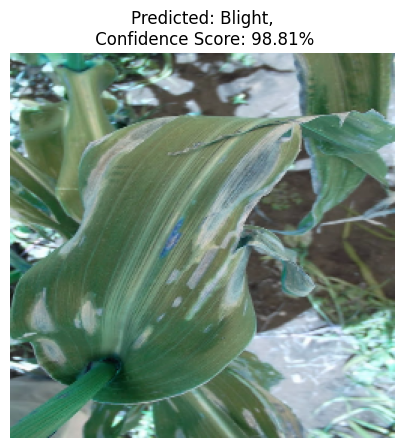

In [6]:
# @title Resultados
carpeta = "/content/Deteccion_plagas_maiz/Test_Images" # @param {type:"string"}

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

# Filtrar solo los archivos de imagen (puedes ajustar las extensiones según tus necesidades)
archivos_imagen = [archivo for archivo in archivos if archivo.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Recorrer los archivos de imagen
i=0
#Se grafica imagenes del dataset de prueba
for archivo_imagen in archivos_imagen:
    # Construir la ruta completa del archivo de imagen
    ruta_imagen = os.path.join(carpeta, archivo_imagen)
    Imagetest=cv2.imread(ruta_imagen)
    img = cv2.resize(Imagetest,(256,256))
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    predicted_class , confidence = predict(model,img)
    plt.title(f"Predicted: {predicted_class},\n Confidence Score: {confidence}%")
    plt.axis("off")


# Imagenes subidas por el usuario

1/1 [==============================] - 0s 29ms/step


(-0.5, 255.5, 255.5, -0.5)

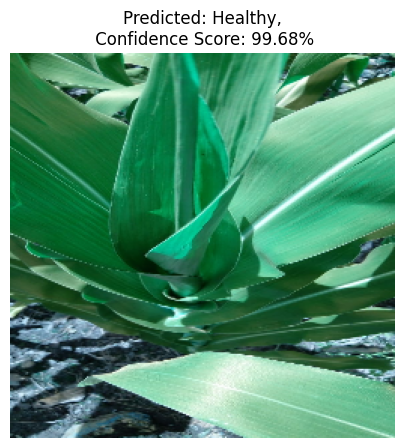

In [7]:
# @title Ingrese el path de su imagen para realizar la prueba
Path = "/content/Deteccion_plagas_maiz/Test_Images/Healthy01.jpg" # @param {type:"string"}
Imagetest=cv2.imread(Path)
img = cv2.resize(Imagetest,(256,256))
plt.figure(figsize=(5,5))
plt.imshow(img)
predicted_class , confidence = predict(model,img)
plt.title(f"Predicted: {predicted_class},\n Confidence Score: {confidence}%")
plt.axis("off")